In [49]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [50]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [51]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [52]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [53]:
# reflect an existing database into a new model
Base = automap_base()
    
# reflect the tables
Base.prepare(engine, reflect=True)


/var/folders/6_/9k0y_t195_sbx0kj9l94p0qr0000gn/T/ipykernel_59817/2846107710.py:6: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [54]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [55]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [56]:
# Create our session (link) from Python to the DB

session = Session(engine)



# Exploratory Precipitation Analysis

In [57]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(recent_date)


('2017-08-23',)


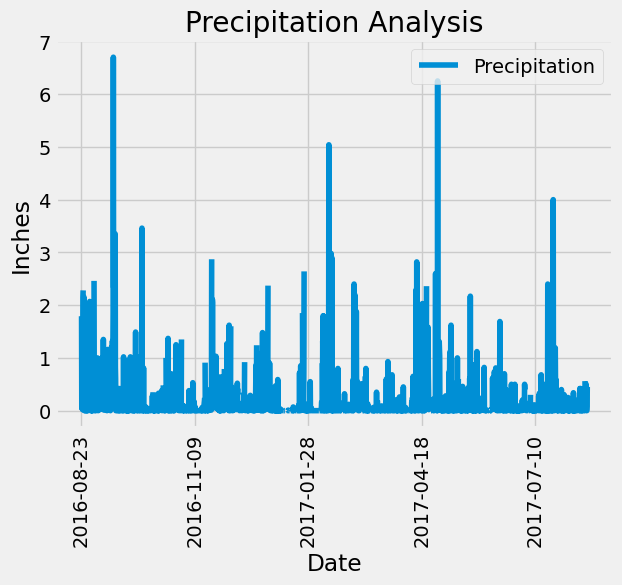

In [58]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.


# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
recent_date = dt.datetime.strptime(recent_date[0], '%Y-%m-%d')
year_ago = recent_date - dt.timedelta(days=365)
year_ago = year_ago.strftime('%Y-%m-%d')
# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(results, columns=['date', 'precipitation'])

# Sort the dataframe by date
df = df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x='date', y='precipitation', rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.title("Precipitation Analysis")
plt.legend(["Precipitation"], loc = 'upper right')
plt.show()






In [65]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,Temperature
count,352.000000
mean,73.107955
std,4.733315
min,59.000000
25%,70.000000
50%,74.000000
75%,77.000000
max,83.000000


# Exploratory Station Analysis

In [60]:
# Design a query to calculate the total number of stations in the dataset
total = session.query(func.count(Station.station)).scalar()


In [61]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by((func.count(Measurement.station)).desc()).all()
active_stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [62]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = active_stations[0][0]

sel = [func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs)]
active = session.query(*sel).\
    filter(Measurement.station == most_active).all()
active

[(54.0, 85.0, 71.66378066378067)]

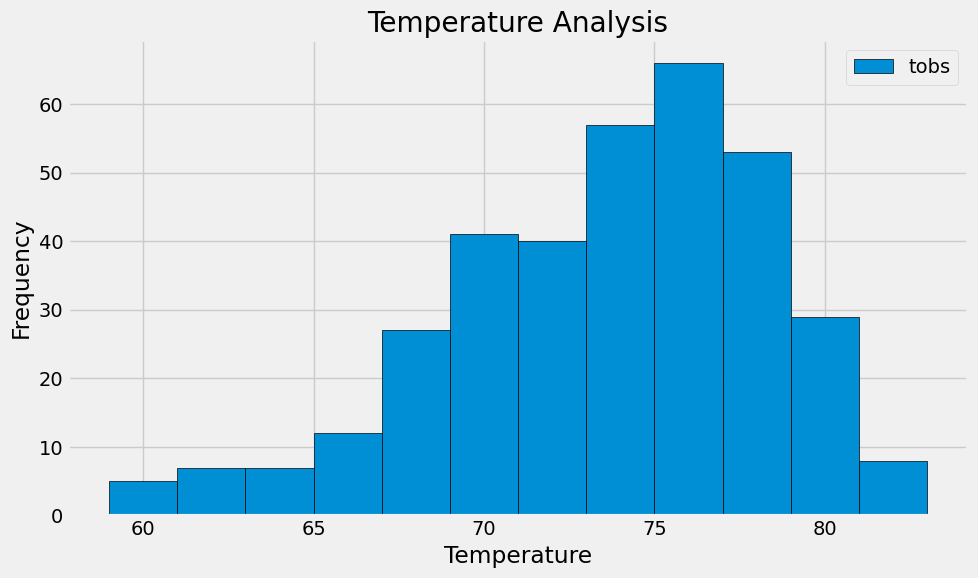

In [63]:
# Using the most active station id
most_active = active_stations[0][0]
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == most_active).\
    filter(Measurement.date >= year_ago).all()
df = pd.DataFrame(results, columns=['date', 'Temperature'])

temp = df['Temperature']

plt.figure(figsize=(10,6))
plt.hist(temp, bins=12,label="tobs", edgecolor='black')
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Temperature Analysis")
plt.legend(loc = 'upper right') 
plt.tight_layout()
plt.show()

# Close Session

In [64]:
# Close Session
session.close()